# IMPORTACIÓN DE DATOS

In [1]:
import pandas as pd #Manipulación de datos
import os #Manejo de Archivos Drive

In [2]:
import sys

if 'google.colab' in sys.modules:
  from google.colab import drive
  drive.mount('/content/drive')
  dir = '/content/drive/MyDrive/ESIS_2024/7mo_semestre/Analitica_Datos/UNID02/TrabajoUnidad02/Data/bank'
else:
  dir = './Data/bank/'
  
os.listdir(dir)

['bank-full.csv',
 'bank-names.txt',
 'bank.csv',
 'bank-full-trad.xlsx',
 'bank-full.xlsx',
 'bank-full-trad-num.xlsx']

In [3]:
archivo = f'{dir}bank-full.xlsx'
data_xls = pd.read_excel(archivo, sheet_name='bank-full')
data_xls.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# PREPARACIÓN DE DATA

In [4]:
data_xls.head()
# Copiar el dataframe
df_clean = data_xls.copy()
df_clean


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


### a. Identificacion de categorias de columnas

In [5]:
print( 'Job: ',  df_clean['job'].unique())
print( 'Marital: ', df_clean['marital'].unique())
print( 'Education: ' , df_clean['education'].unique())
print( 'Default: ' , df_clean['default'].unique())
print( 'Housing: ' , df_clean['housing'].unique())
print( 'Loan: ' , df_clean['loan'].unique())
print( 'Contact: ' , df_clean['contact'].unique())
print( 'Month: ' , df_clean['month'].unique())
print( 'PoutCome: ' , df_clean['poutcome'].unique())
print( 'Y: ' , df_clean['y'].unique())

Job:  ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Marital:  ['married' 'single' 'divorced']
Education:  ['tertiary' 'secondary' 'unknown' 'primary']
Default:  ['no' 'yes']
Housing:  ['yes' 'no']
Loan:  ['no' 'yes']
Contact:  ['unknown' 'cellular' 'telephone']
Month:  ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
PoutCome:  ['unknown' 'failure' 'other' 'success']
Y:  ['no' 'yes']


> REEMPLAZO DE DICOTOMICOS POR 0 Y 1

In [6]:
df_clean['y'] = [ 0 if x == 'no' else 1 for x in df_clean['y'] ]
df_clean['default'] = [ 0 if x == 'no' else 1 for x in df_clean['default'] ]
df_clean['housing'] = [ 0 if x == 'no' else 1 for x in df_clean['housing'] ]
df_clean['loan'] = [ 0 if x == 'no' else 1 for x in df_clean['loan'] ]
df_clean.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


> GENERACIO NDE DUMMIES PARA COLUMNAS CATEGORICAS

In [7]:
columnasParaDummies = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
dummies = pd.get_dummies(df_clean[columnasParaDummies])

In [8]:
# Cmprobacion de nuevas columnas creadas por dummies
columnaImprimir = 'contact'

# Filtrar las columnas que empiezan con una columna específica
columnas_job = [col for col in dummies.columns if col.startswith(columnaImprimir)]
# Imprimir las columnas filtradas
print(f"Columnas que empiezan con {columnaImprimir}:\n {columnas_job} \n")
# Mostrar las primeras filas de las columnas filtradas
print(dummies[columnas_job].head())


Columnas que empiezan con contact:
 ['contact_cellular', 'contact_telephone', 'contact_unknown'] 

   contact_cellular  contact_telephone  contact_unknown
0             False              False             True
1             False              False             True
2             False              False             True
3             False              False             True
4             False              False             True


> Eliminacion de columnas que no son dummies

In [9]:
df_clean = df_clean.drop(columns=columnasParaDummies)

In [10]:
# Fusionamos el dataframe original con las columnas dummies
df_clean = pd.concat([df_clean, dummies], axis=1)
df_clean.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,False,False,True,False,False,False,False,False,False,True
1,44,0,29,1,0,5,151,1,-1,0,...,False,False,True,False,False,False,False,False,False,True
2,33,0,2,1,1,5,76,1,-1,0,...,False,False,True,False,False,False,False,False,False,True
3,47,0,1506,1,0,5,92,1,-1,0,...,False,False,True,False,False,False,False,False,False,True
4,33,0,1,0,0,5,198,1,-1,0,...,False,False,True,False,False,False,False,False,False,True


### b. Escalamos los rangos

Cuando utilizas SMOTE (Synthetic Minority Over-sampling Technique) para balancear clases en un conjunto de datos desbalanceado, es una buena práctica escalar nuestros datos antes de aplicar SMOTE. La razón principal para esto es que SMOTE genera ejemplos sintéticos al interpolar entre ejemplos existentes, y las características deben estar en la misma escala para que estas interpolaciones sean efectivas.

Usaremos MinMaxScaler de scikit-learn para escalar columnas que tengan valores superiores a 1 en el rango [0, 1]. Aqui cómo:

Para normalizar un valor $X$ al rango $[0, 1]$, utilizamos la fórmula:

$$
X_{\text{norm}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}
$$

donde:
- $X$ es el valor original.
- $X_{\text{min}}$ es el valor mínimo en el rango original.
- $X_{\text{max}}$ es el valor máximo en el rango original.
- $X_{\text{norm}}$ es el valor normalizado.


In [11]:
from sklearn.preprocessing import MinMaxScaler

# Selecciona las columnas que tienen valores mayores a 1
to_scale = [col for col in df_clean.columns if df_clean[col].max() > 1] 

mms = MinMaxScaler() # Se crea el objeto MinMaxScaler
df_clean[to_scale] = mms.fit_transform(df_clean[to_scale]) # Se escalan las columnas seleccionadas
df_clean

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0.519481,0,0.092259,1,0,0.133333,0.053070,0.000000,0.000000,0.000000,...,False,False,True,False,False,False,False,False,False,True
1,0.337662,0,0.073067,1,0,0.133333,0.030704,0.000000,0.000000,0.000000,...,False,False,True,False,False,False,False,False,False,True
2,0.194805,0,0.072822,1,1,0.133333,0.015453,0.000000,0.000000,0.000000,...,False,False,True,False,False,False,False,False,False,True
3,0.376623,0,0.086476,1,0,0.133333,0.018707,0.000000,0.000000,0.000000,...,False,False,True,False,False,False,False,False,False,True
4,0.194805,0,0.072812,0,0,0.133333,0.040260,0.000000,0.000000,0.000000,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.428571,0,0.080293,0,0,0.533333,0.198658,0.032258,0.000000,0.000000,...,False,False,False,True,False,False,False,False,False,True
45207,0.688312,0,0.088501,0,0,0.533333,0.092721,0.016129,0.000000,0.000000,...,False,False,False,True,False,False,False,False,False,True
45208,0.701299,0,0.124689,0,0,0.533333,0.229158,0.064516,0.212156,0.010909,...,False,False,False,True,False,False,False,False,True,False
45209,0.506494,0,0.078868,0,0,0.533333,0.103294,0.048387,0.000000,0.000000,...,False,False,False,True,False,False,False,False,False,True


# RANDOM FOREST DIRECTO

In [12]:
# Recordamos la cantidad de datos de la clase dependiente para ver el desbalance
df_clean['y'].value_counts()


y
0    39922
1     5289
Name: count, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
import numpy as np

In [14]:
X = df_clean.drop('y', axis=1) # Covariables
y = df_clean['y' ] # Variable Dependiente

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Cantidad de respuestas positivas para Y en Train y Test
print(

f'''% Datos positivos (1) en la clase Train = {np.round(y_train.value_counts(normalize=True)[1] * 100, 2)}%
% Datos positivos (1) en la clase Test = {np.round(y_test.value_counts(normalize=True)[1] * 100, 2)}%'''

)

% Datos positivos (1) en la clase Train = 11.61%
% Datos positivos (1) en la clase Test = 11.97%


* `normalize=True` = Nos devuelve el porcentaje de ocurrencias de y_test, con respecto al su indice 1 ( [1] )

### Entrenamos el modelo desbalanceado

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

# Train
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

preds = model.predict(X_test)

# Evaluate
print(f'Accuracy = {accuracy_score(y_test, preds) :.2f}\nRecall = {recall_score(y_test, preds) :.2f}\n')
cm = confusion_matrix(y_test, preds)

Accuracy = 0.90
Recall = 0.39



> Matriz de confusión

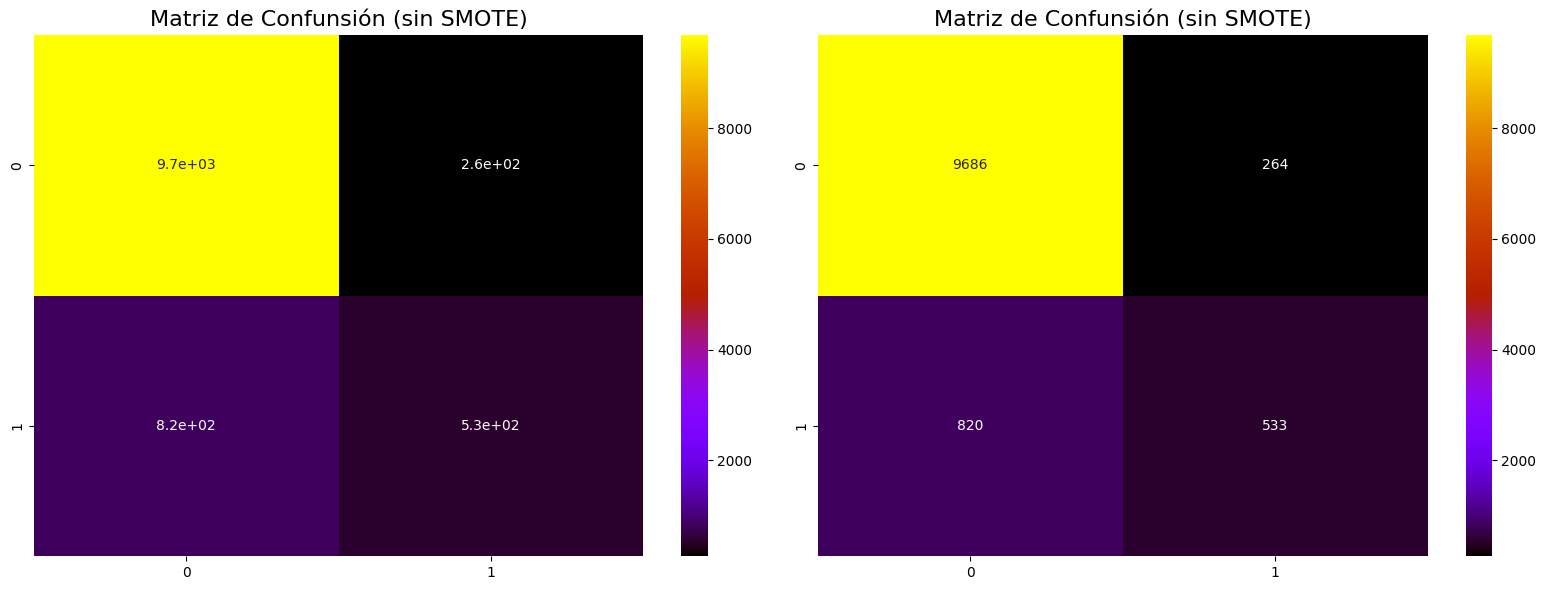

In [16]:

# Creamos una figura con dos subgráficos uno al lado del otro
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Primer gráfico
axes[0].set_title('Matriz de Confunsión (sin SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap="gnuplot", ax=axes[0])

# Segundo gráfico
axes[1].set_title('Matriz de Confunsión (sin SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap="gnuplot", fmt='d', ax=axes[1])

# Mostrar los gráficos
plt.tight_layout()
plt.show()

Un `recall` de 0.39 significa que el modelo identificó correctamente el 39% de las instancias positivas reales. Es decir, que se equivoco en el 61% de los falsos positivos

* ***Accuracy = 0.90***: El modelo tiene una alta precisión, lo que indica que la mayoría de las predicciones son correctas.
* ***Recall = 0.39***: El modelo tiene una baja sensibilidad, lo que indica que no está capturando bien las instancias positivas. Esto puede ser problemático en casos donde es crucial identificar correctamente las instancias positivas, como para nuestro caso saber si el perfil de un cliente tomará un nuevo credito.

***Conclusión***
Aunque el modelo tiene una alta precisión, su baja sensibilidad sugiere que podría estar fallando en identificar muchas instancias positivas. Dependiendo del contexto y del problema específico, debemos ajustar el modelo

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds)) 

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      9950
           1       0.67      0.39      0.50      1353

    accuracy                           0.90     11303
   macro avg       0.80      0.68      0.72     11303
weighted avg       0.89      0.90      0.89     11303



***El método classification_report de sklearn.metrics genera un informe que muestra las principales métricas de clasificación para cada clase en un problema de clasificación. Aquí tienes una explicación de las métricas que se incluyen en el informe:***
Clase 0:

- ***Precisión:*** `0.92` (El `92%` de las predicciones para la clase 0 fueron correctas).
- ***Recall:*** `0.97` (El `97%` de los verdaderos ejemplos de la clase 0 fueron correctamente identificados).
- ***F1-Score:*** `0.95` (Media armónica de precisión y recall).
- ***Soporte:*** `9950` (Número de ejemplos reales de la clase 0).


# RANDOM FOREST `con SMOTE`

## a. APLICACIÓN DE SMOTE

In [18]:
# Separamos covariables de variable objetivo
covariables = df_clean.drop(columns=['y'])
objetivo = df_clean['y']

In [19]:
# pip install imbalanced-learn

In [20]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='minority')
# sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(covariables, objetivo)

print(f'''Shape of X before SMOTE: {covariables.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100


Shape of X before SMOTE: (45211, 48)
Shape of X after SMOTE: (79844, 48)

Balance of positive and negative classes (%):


y
0    50.0
1    50.0
Name: proportion, dtype: float64

> Comparacion de Datos `y` sin smote y con smote

In [21]:
print ( f'y antes de SMOTE: {objetivo.value_counts()}')
print ( f'y después de SMOTE: {y_sm.value_counts()}')

y antes de SMOTE: y
0    39922
1     5289
Name: count, dtype: int64
y después de SMOTE: y
0    39922
1    39922
Name: count, dtype: int64


## b. ENTRENAMIENTO `RANDOM FOREST` CON DATOS SMOTE

In [22]:
# Division de datos en Train y Test
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size=0.25, random_state=42)

# Train
model = RandomForestClassifier(random_state=42)
model.fit(X_train_sm, y_train_sm)

preds_sm = model.predict(X_test_sm)

# Evaluate
print(f'Accuracy = {accuracy_score(y_test_sm, preds_sm) :.2f}\nRecall = {recall_score(y_test_sm, preds_sm) :.2f}\n')
cm_sm = confusion_matrix(y_test_sm, preds_sm)

Accuracy = 0.94
Recall = 0.97



> Matriz de confusion con SMOTE

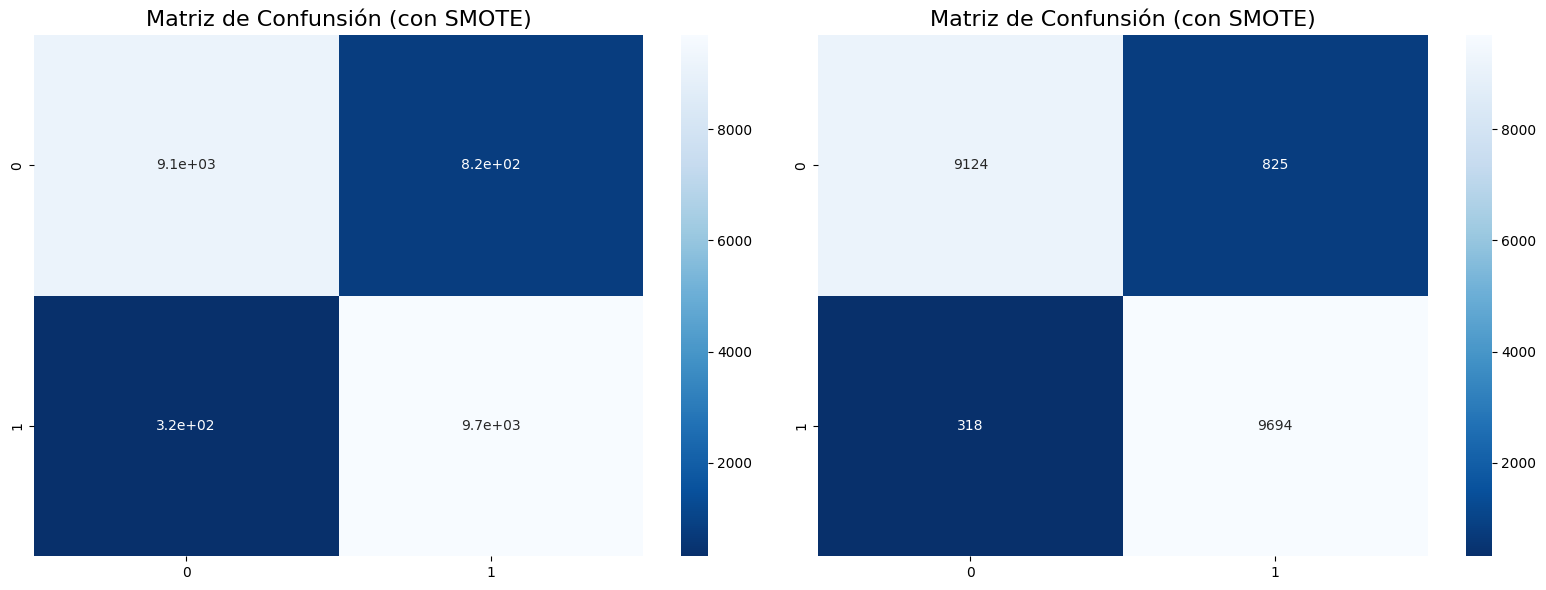

In [23]:

# Creamos una figura con dos subgráficos uno al lado del otro
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Primer gráfico
axes[0].set_title('Matriz de Confunsión (con SMOTE)', size=16)
sns.heatmap(cm_sm, annot=True, cmap="Blues_r", ax=axes[0])

# Segundo gráfico
axes[1].set_title('Matriz de Confunsión (con SMOTE)', size=16)
sns.heatmap(cm_sm, annot=True, cmap="Blues_r", fmt='d', ax=axes[1])

# Mostrar los gráficos
plt.tight_layout()
plt.show()

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test_sm, preds_sm)) 

              precision    recall  f1-score   support

           0       0.97      0.92      0.94      9949
           1       0.92      0.97      0.94     10012

    accuracy                           0.94     19961
   macro avg       0.94      0.94      0.94     19961
weighted avg       0.94      0.94      0.94     19961



## c. Comparacion de matrices de confusion

Tenemos ahora 2 matrices de confusión, una sin SMOTE y otra con SMOTE. Para eso tenemos las variables:

> `cm` y `cm_sm` que contienen las matrices de confusión.

> `preds` y `preds_sm` contienen las predicciones de los modelos sin y con SMOTE respectivamente.

In [25]:
print('Variables cm con y sinn SMOTE' )
print (f'cm: {cm} \ncm_sm: {cm_sm}')
print()
print('Variables pred con y sinn SMOTE' )
print (f'preds: {preds} \npreds_sm: {preds_sm}')

Variables cm con y sinn SMOTE
cm: [[9686  264]
 [ 820  533]] 
cm_sm: [[9124  825]
 [ 318 9694]]

Variables pred con y sinn SMOTE
preds: [0 0 0 ... 0 0 0] 
preds_sm: [1 1 1 ... 0 0 0]


<Axes: title={'center': 'Matriz de Confunsión (con SMOTE)'}>

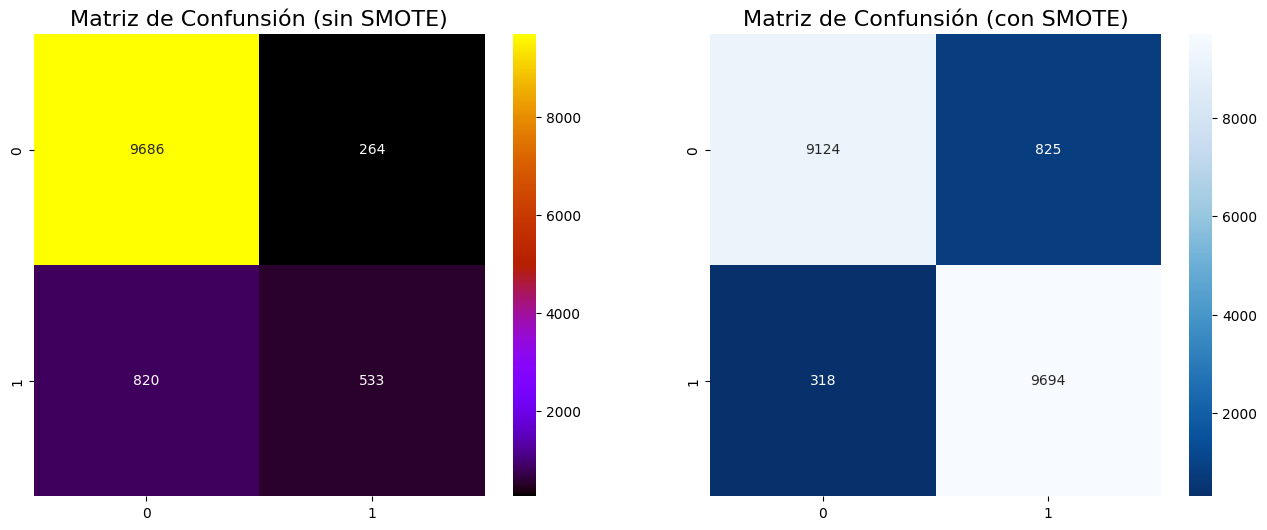

In [26]:
# Creamos una figura con dos subgráficos uno al lado del otro
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Primer gráfico sin SMOTE
axes[0].set_title('Matriz de Confunsión (sin SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap="gnuplot",fmt='d', ax=axes[0])

# Segundo gráfico con SMOTE
axes[1].set_title('Matriz de Confunsión (con SMOTE)', size=16)
sns.heatmap(cm_sm, annot=True, cmap="Blues_r", fmt='d', ax=axes[1]) 


In [124]:
# Comparar los dos modelos con y sin SMOTE
print(classification_report(y_test, preds))
print(classification_report(y_test_sm, preds_sm))
 

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      9950
           1       0.67      0.39      0.50      1353

    accuracy                           0.90     11303
   macro avg       0.80      0.68      0.72     11303
weighted avg       0.89      0.90      0.89     11303

              precision    recall  f1-score   support

           0       0.97      0.92      0.94      9949
           1       0.92      0.97      0.95     10012

    accuracy                           0.94     19961
   macro avg       0.94      0.94      0.94     19961
weighted avg       0.94      0.94      0.94     19961

